<a href="https://colab.research.google.com/github/hidhartha/IPL_win_prob_prediction_and_EDA/blob/main/IPL_Win_probability_Prediction_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IPL data analysis and win probability prediction**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
match = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Data analysis and score predictor/matches.csv')
delivery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Data analysis and score predictor/deliveries.csv')

In [ ]:
match.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


## Data Visualization

In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
match = match.drop(['umpire1', 'umpire2', 'umpire3'], axis=1)

# **Exploratory Data Analysis(EDA)**

In [ ]:
match.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [ ]:
match.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

**Top 5 most player of the match**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


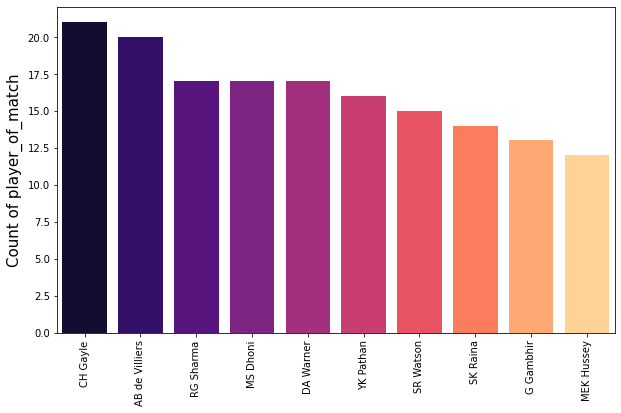

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(list(match['player_of_match'].value_counts()[0:10].keys()), list(match['player_of_match'].value_counts()[0:10]), palette='magma', saturation=1)
plt.xticks(rotation='vertical')
plt.ylabel('Count of player_of_match',fontsize=15)
plt.show()


*We can see that Chris Gayle has won the most number of player of match*

**Barplot of count of normal matches, ties and no result matches.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

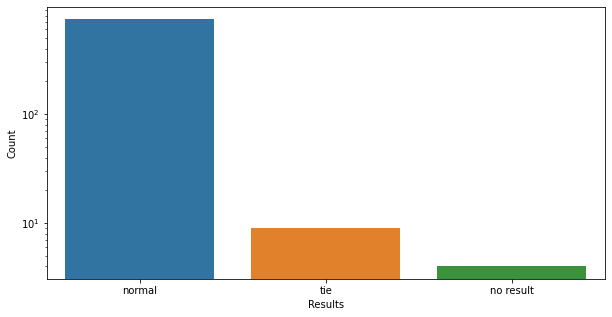

In [ ]:
result_label = match.result.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(result_label.index, result_label, log=True)
plt.xlabel('Results')
plt.ylabel('Count')

**Toss Decision**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


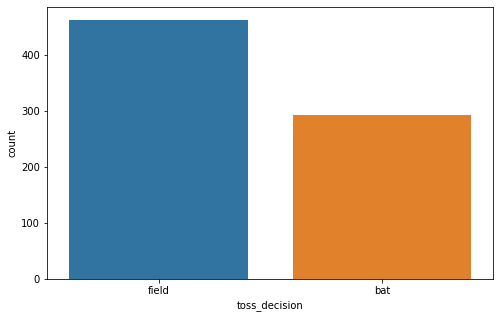

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(match.toss_decision)

**Decision taken by captains after winning toss**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


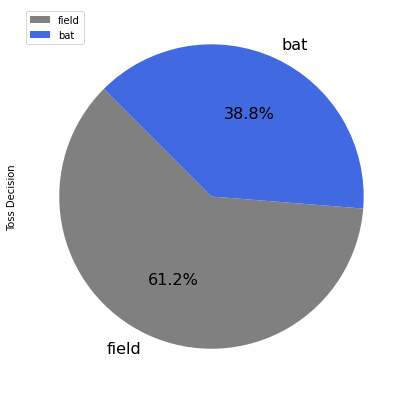

In [ ]:
match['toss_decision'].value_counts().plot(kind='pie', fontsize=16, autopct='%3.1f%%', colors=['gray', 'royalblue'],
                                               figsize=(10,7), startangle=135, legend=True, cmap='Oranges')
plt.ylabel('Toss Decision')
plt.show()

In [ ]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

It is found that the team 'Rising Pune Supergiant' is present in 3 different names 'Rising Pune Supergiant', 'Pune Warriors' and 'Rising Pune Supergiants'. Since they are the same team I am combining their rows under a single name 'Rising Pune Supergiants'. Similarly 'Delhi Daredevils' is renamed as 'Delhi Capitals' respectively.

In [ ]:
for i in range(len(match)):
  if match['team1'][i] == 'Rising Pune Supergiants':
    match['team1'][i] = 'Rising Pune Supergiant'
  elif match['team1'][i] == 'Delhi Daredevils':
    match['team1'][i] = 'Delhi Capitals'
  elif match['team1'][i] =='Pune Warriors':
    match['team1'][i] = 'Rising Pune Supergiant'
  else:
    continue

for i in range(len(match)):
  if match['team2'][i] == 'Rising Pune Supergiants':
    match['team2'][i] = 'Rising Pune Supergiant'
  elif match['team2'][i] == 'Delhi Daredevils':
    match['team2'][i] = 'Delhi Capitals'
  elif match['team1'][i] == 'Pune Warriors':
    match['team2'][i] = 'Rising Pune Supergiant'  
  else:
    continue


for i in range(len(match)):
  if match['toss_winner'][i] == 'Rising Pune Supergiants':
    match['toss_winner'][i] = 'Rising Pune Supergiant'
  elif match['toss_winner'][i] == 'Delhi Daredevils':
    match['toss_winner'][i] = 'Delhi Capitals'
  elif match['toss_winner'][i] == 'Pune Warriors':
    match['toss_winner'][i] = 'Rising Pune Supergiant'
  else:
    continue

for i in range(len(match)):
  if match['winner'][i] == 'Rising Pune Supergiants':
    match['winner'][i] = 'Rising Pune Supergiant'
  elif match['winner'][i] == 'Delhi Daredevils':
    match['winner'][i] = 'Delhi Capitals'
  elif match['winner'][i] == 'Pune Warriors':
    match['winner'][i] = 'Rising Pune Supergiant'
  else:
    continue   


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib

**Most toss winners in all seasons**

Text(0.5, 1.0, 'Most Toss Winners')

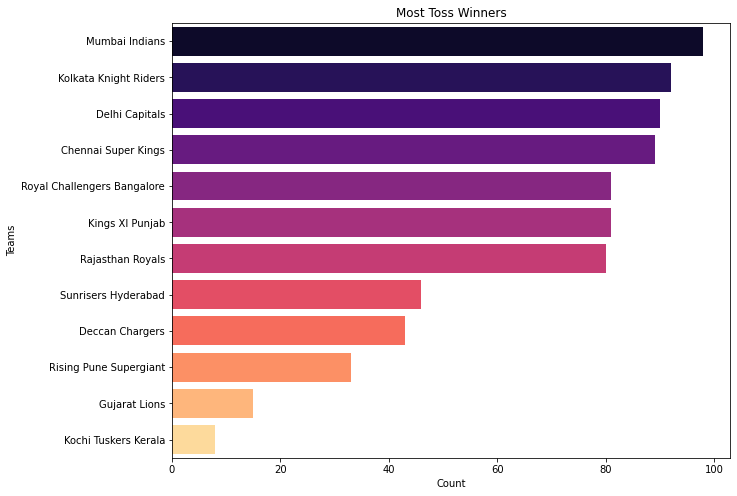

In [ ]:
toss_win_label = match.toss_winner.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=toss_win_label, y=toss_win_label.index, palette='magma', saturation=1)
plt.ylabel('Teams')
plt.xlabel('Count')
plt.title('Most Toss Winners')

*We can see that Mumbai Indians has won the most number of toss.*

**Plot of matches played each season**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Count of Number of Matches Played')

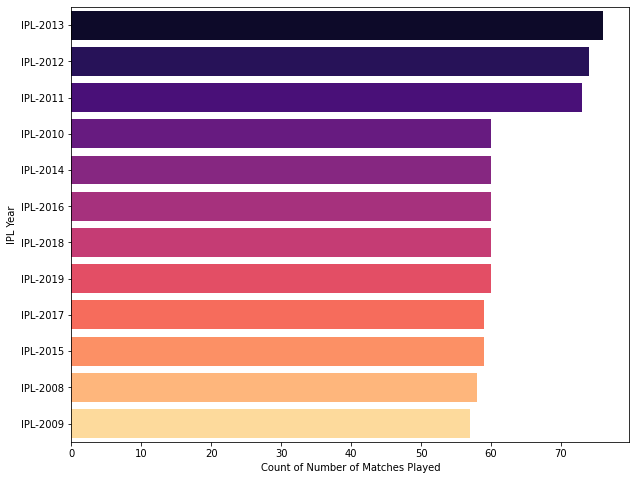

In [ ]:
plt.figure(figsize=(10,8))
season = match['Season'].value_counts()
sns.barplot(season, season.index, palette='magma', saturation=1)
plt.ylabel('IPL Year')
plt.xlabel('Count of Number of Matches Played')

*So, most number of IPL matches were played in the year 2013.*

**Plot of number of IPL matches played in top 10 cities**

Text(0.5, 0, 'Count of Number of matches Played')

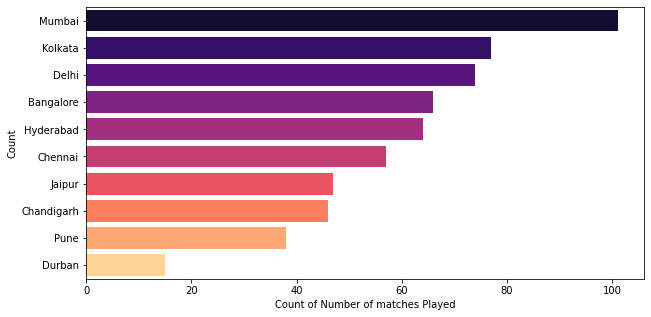

In [ ]:
city = match['city'].value_counts().sort_values().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city, y=city.index, palette='magma', saturation=1)
plt.ylabel('Count')
plt.xlabel('Count of Number of matches Played')

*So, maximum IPL matches were played in Mumbai followed by Kolakata and Delhi.*

**Plot of number of matches played in different stadiums.**

Text(0.5, 1.0, 'Number of matches played vs stadiums')

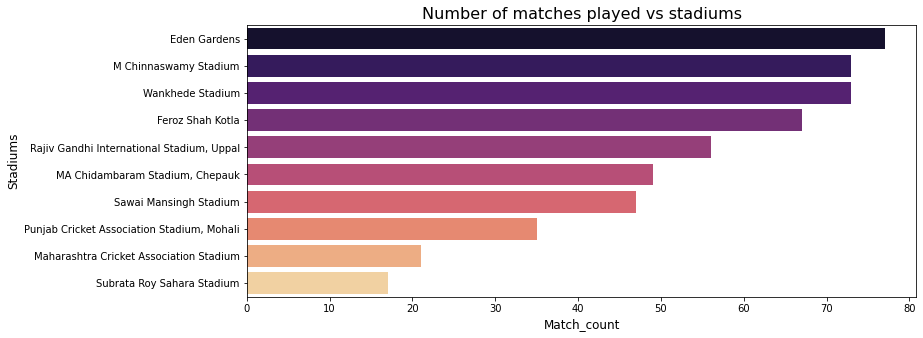

In [ ]:

plt.figure(figsize=(12,5))
sns.countplot(y=match['venue'],order=match['venue'].value_counts().index[0:10],palette='magma')
plt.xlabel('Match_count',fontsize=12)
plt.ylabel('Stadiums',fontsize=12)
plt.title('Number of matches played vs stadiums',fontsize=16)

*So, the maximum number of IPL matches are played in Eden Gardens.*

**Plot of total number of wins of different teams.**

Text(0.5, 0, 'Count of Number of wins.')

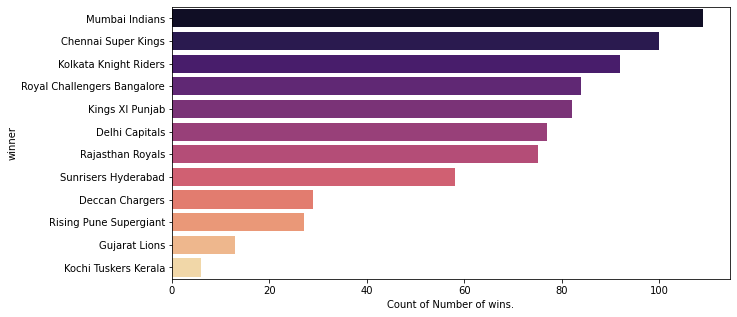

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=match['winner'],order=match['winner'].value_counts().index[:],palette='magma')
plt.xlabel('Count of Number of wins.')

*So, we can see that Mumbai Indians has won maximum number of matches in IPL.*

**Teams who won batting first most number of times**

In [ ]:
batting_first=match[match['win_by_runs']!=0]
batting_first['winner'].value_counts()[0:5]
match[match['win_by_runs']!=0]['winner'].value_counts().index[0:5]

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore'],
      dtype='object')

Text(0.5, 1.0, 'Teams winning most number of times batting first')

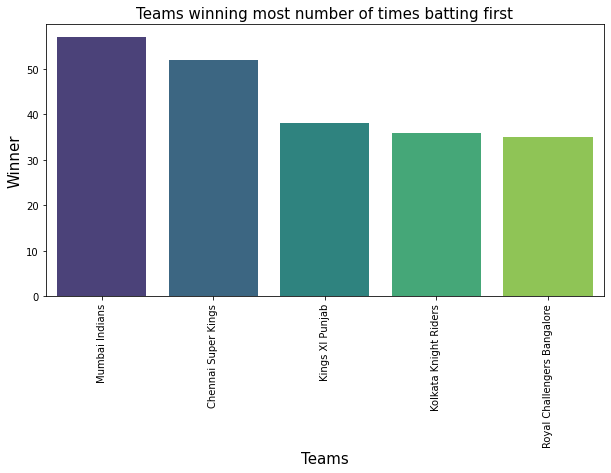

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=match[match['win_by_runs']!=0]['winner'].value_counts().index[0:5],
                                    y=batting_first['winner'].value_counts()[0:5],palette='viridis')

plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Winner',fontsize=15)
plt.title('Teams winning most number of times batting first',fontsize=15)

*So, Mumbai Indians won most matches batting first*

**Teams who won bowling first most number of times**

In [ ]:
bowling_first=match[match['win_by_wickets']!=0]
bowling_first['winner'].value_counts()[0:5]
match[match['win_by_wickets']!=0]['winner'].value_counts().index[0:5]

Index(['Kolkata Knight Riders', 'Mumbai Indians', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Chennai Super Kings'],
      dtype='object')

Text(0.5, 1.0, 'Teams winning most number of times bowling first')

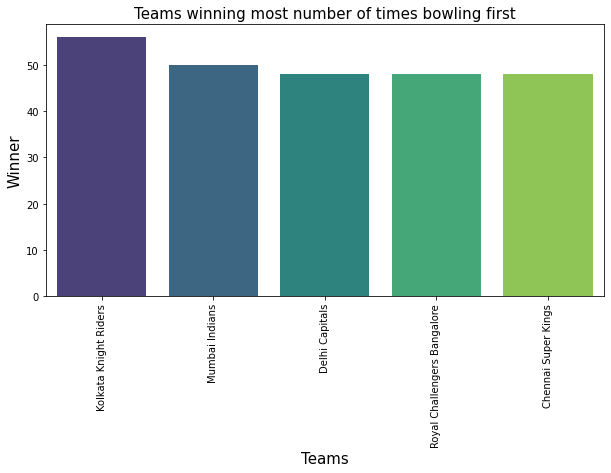

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=match[match['win_by_wickets']!=0]['winner'].value_counts().index[0:5],
                                    y=bowling_first['winner'].value_counts()[0:5],palette='viridis')

plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Winner',fontsize=15)
plt.title('Teams winning most number of times bowling first',fontsize=15)

*So, Kolkata Knight Riders won most matches batting first*

**Teams winning batting first**

In [ ]:
batting_first=match[match['win_by_runs']!=0]

In [ ]:
batting_first["winner"].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Delhi Capitals                 28
Rajasthan Royals               27
Deccan Chargers                18
Rising Pune Supergiant         13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

**Pie chart of winnng counts of teams batting first**

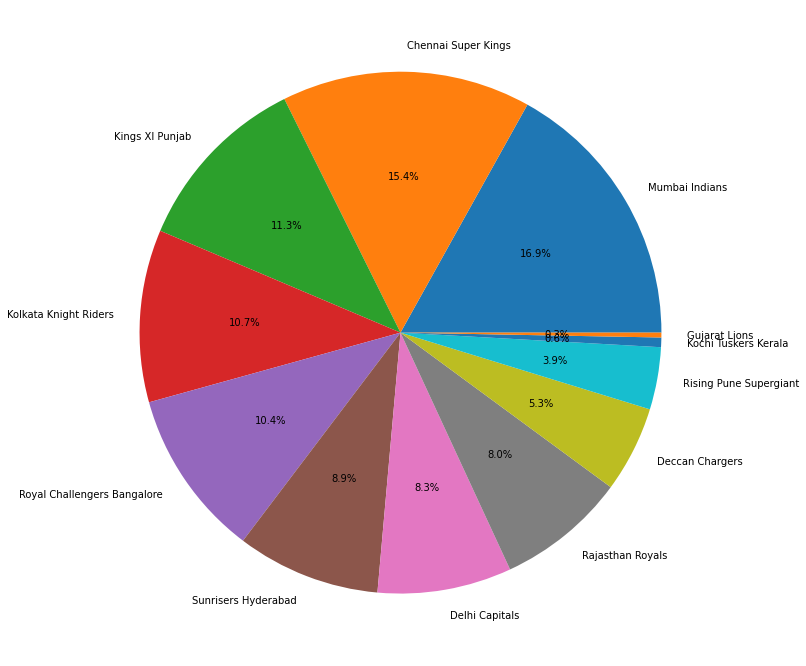

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

*So, we could see that Mumbai Indians has won maximum matches batting first.*

**Distribution of win_by_runs batting first**

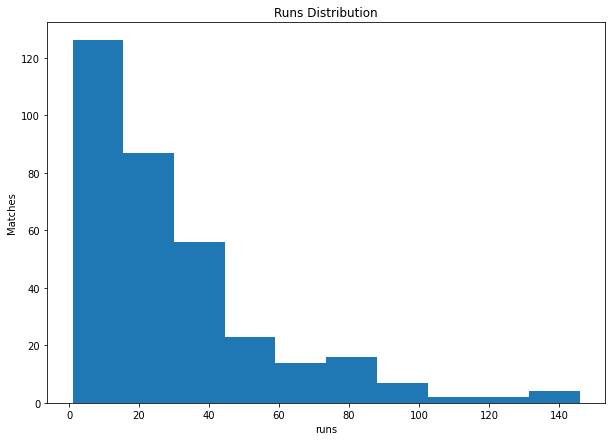

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(batting_first['win_by_runs'])
plt.title("Runs Distribution")
plt.xlabel("runs")
plt.ylabel("Matches")
plt.show()

**Teams winning fielding first**

In [ ]:
batting_second=match[match['win_by_wickets']!=0]

In [ ]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Delhi Capitals                 48
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Sunrisers Hyderabad            27
Rising Pune Supergiant         14
Gujarat Lions                  12
Deccan Chargers                11
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

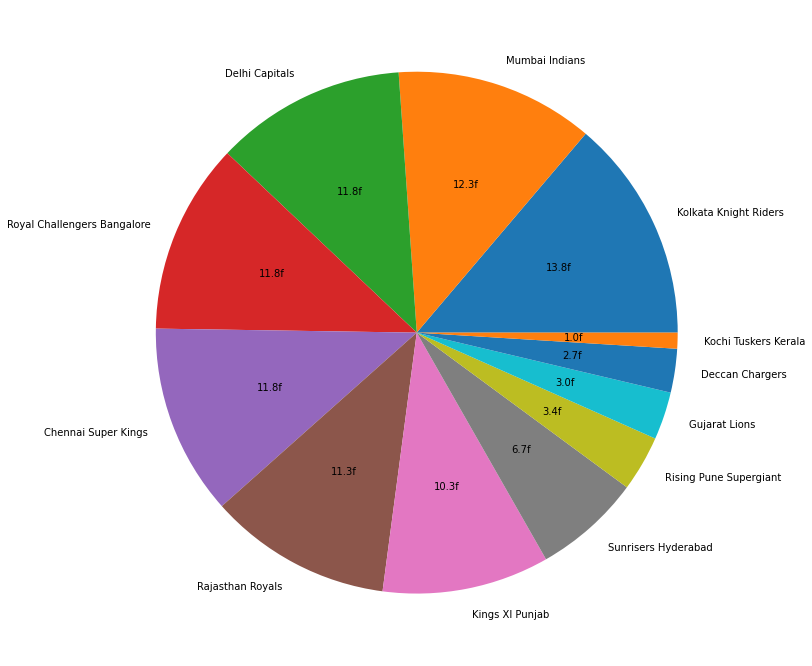

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1ff')
plt.show()

*So, we could see that Kolkata Knight Riders has won maximum matches fielding first.*

## Number of Teams participated each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

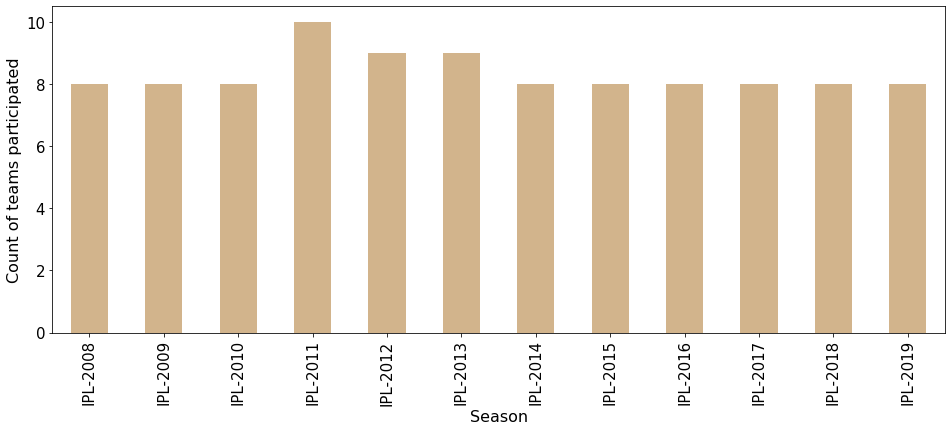

In [ ]:
match.groupby('Season')['team1'].nunique().plot(kind = 'bar', figsize=(16,6),color = 'tan')
plt.ylabel("Count of teams participated", size = 16)
plt.xlabel("Season", size = 16)
plt.xticks(size = 15)
plt.yticks(size = 15)

*So, maximum number of teams participated in the year 2011 (10 teams paticipated)*

**Pie chart of winning by batting first vs fielding first.**

In [ ]:
x = len(match[match['win_by_runs'] != 0])
y = len(match[match['win_by_wickets'] != 0])
z = np.array([x,y])
labels = ['Win by batting first', 'Win by fielding first']

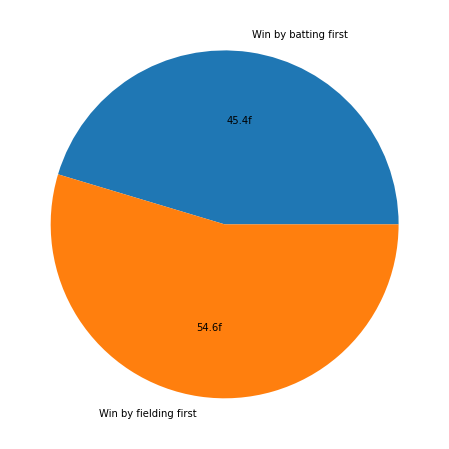

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(z, labels = labels, autopct='%0.1ff')
plt.show() 

*So, the chances of winning is slightly more is the team choose to field first.*

**Delivery Dataset**

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
runs = delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'runs']
z = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
z

,Batsman,runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


**Plot of top 10 run scorers in IPL**

Text(0.5, 1.0, 'Top 10 Runs scoreres in IPL')

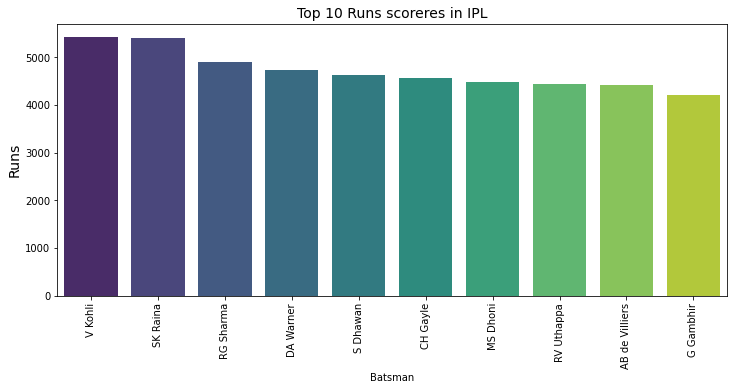

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=z['Batsman'],y=z['runs'],palette='viridis')
plt.xticks(rotation='vertical')
plt.ylabel('Runs',fontsize=14)
plt.title('Top 10 Runs scoreres in IPL',fontsize=14)

*So, we can see that Virat Kohli has scored maximum runs in IPL.*

In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
match_score_df = total_score_df.groupby(['match_id']).sum()['total_runs'].reset_index()
match_score_df

,match_id,total_runs
0,1,379
1,2,371
2,3,367
3,4,327
4,5,299
...,...,...
751,11347,280
752,11412,276
753,11413,341
754,11414,317


In [ ]:
result = pd.concat([match, match_score_df], axis=1, join='inner')
display(result)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,379
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2,371
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,3,367
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,4,327
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,5,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,11347,280
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,11412,276
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,11413,341
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,11414,317


In [ ]:
a = result.groupby(['Season']).sum()['total_runs'].reset_index()

z = a.sort_values(by='total_runs', ascending=False).head(10).reset_index().drop('index', axis=1)
z

,Season,total_runs
0,IPL-2013,22602
1,IPL-2012,22453
2,IPL-2011,21154
3,IPL-2018,20706
4,IPL-2019,20270
5,IPL-2014,18931
6,IPL-2010,18883
7,IPL-2016,18862
8,IPL-2017,18786
9,IPL-2015,18353


**Plot of total runs scored per season.**

Text(0.5, 1.0, 'Total runs scored in IPL seasons')

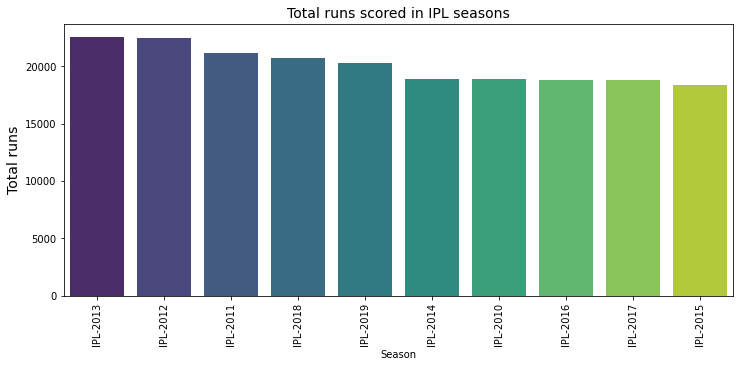

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=z['Season'],y=z['total_runs'],palette='viridis')
plt.xticks(rotation='vertical')
plt.ylabel('Total runs',fontsize=14)
plt.title('Total runs scored in IPL seasons',fontsize=14)

*So, maximum runs was scored in IPL 2013 season.*

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,11414,155


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

*Here, for the match win or lose prediction I am considering only the top 8 most active teams of IPL as the other teams like 'Deccan Chargers' or 'Kochi Tuskers Kerala'etc has not played all the seasons.*

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(641, 17)

In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:

match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
match_df.head(2)

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157


In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets


In [ ]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10


Calculating current run rate

In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


Calculating required run rate

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [ ]:
final_df = final_df.sample(final_df.shape[0])
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
116399,Mumbai Indians,Delhi Daredevils,Delhi,42,20,6,164,7.320000,12.600000,0
17526,Mumbai Indians,Kings XI Punjab,Mumbai,55,37,7,189,9.686747,8.918919,0
27670,Kings XI Punjab,Deccan Chargers,Kimberley,54,37,6,168,8.240964,8.756757,1
6475,Kolkata Knight Riders,Mumbai Indians,Kolkata,155,106,9,173,7.714286,8.773585,0
99892,Kings XI Punjab,Kolkata Knight Riders,Kolkata,145,99,9,163,5.142857,8.787879,0


In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

*Here, 'X' is all the columns of the final_df dataframe except 'result' column and 'y' is the 'result' column of the final_df dataframe.*

Creating the train and test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

Using Logistic Regression

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8264068960684

In [ ]:
pipe.predict_proba(X_test)[11]

array([0.71845594, 0.28154406])

Using Random Forest Classifier

In [ ]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [ ]:
pipe1.fit(X_train,y_train)
y_pred1 = pipe1.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.9985282780853598

In [ ]:
pipe1.predict_proba(X_test)[11]

array([0.93, 0.07])

*So, no doubt I am getting a higher accuracy using Random Forest Classifier but this will not privide me a good prediction of the probability as it is providinh one-sided probabilities. So, I am preferring to use Logistic Regression instead of Random Forest Classifier to predict probabilities of winning or loosing a match.*

In [ ]:
print("List of IPL teams:\n'Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders',\n'Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Delhi Capitals\n")
print("List of cities:\n'Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', \n'Delhi','Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', \n'Port Elizabeth','Durban', 'Centurion', 'East London', 'Johannesburg', \n'Kimberley','Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', \n'Dharamsala','Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', \n'Abu Dhabi','Sharjah', 'Mohali', 'Bengaluru")


List of IPL teams:
'Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders',
'Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Delhi Capitals

List of cities:
'Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 
'Delhi','Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 
'Port Elizabeth','Durban', 'Centurion', 'East London', 'Johannesburg', 
'Kimberley','Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 
'Dharamsala','Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 
'Abu Dhabi','Sharjah', 'Mohali', 'Bengaluru


**Taking Inputs**

In [ ]:
batting_team = input("Enter batting team: ")
bowling_team = input("Enter bowling team: ")
selected_city = input("Enter city: ")
target = int(input("Enter target score: "))
score = int(input("Enter current score: "))
overs = int(input("Enter overs: "))
wickets = int(input("Enter wickets: "))

Enter batting team: Mumbai Indians
Enter bowling team: Delhi Capitals
Enter city: Mohali
Enter target score: 163
Enter current score: 45
Enter overs: 4
Enter wickets: 1


**Win probablity prediction**

In [ ]:
runs_left = target - score
balls_left = 120 - (overs*6)
wickets = 10 - wickets
crr = score/overs
rrr = (runs_left*6)/balls_left

input_df = pd.DataFrame({'batting_team':[batting_team],'bowling_team':[bowling_team],'city':[selected_city],'runs_left':[runs_left],'balls_left':[balls_left],'wickets':[wickets],'total_runs_x':[target],'crr':[crr],'rrr':[rrr]})
result = pipe.predict_proba(input_df)
loss = result[0][0]
win = result[0][1]

print("The probability of winning the match for both the teams are as follows:\n")
print(batting_team + "- " + str(round(win*100)) + "%")
print(bowling_team + "- " + str(round(loss*100)) + "%")


The probability of winning the match for both the teams are as follows:

Mumbai Indians- 63%
Delhi Capitals- 37%
